### Example of curating DTC data using CYP2C9 (FRCE)

Written by Titli Sarkar (titli.sarkar@nih.gov) on March 3, 2023

Simplified data curation steps for raw data pulled from DTC.

Data location (on FRCE): Initial dataset downloaded from Drug Target Commons (DTC) database and stored below:

1> cd /mnt/projects/ATOM/sarkart4/CYP_Data_Curation/data/

   mkdir dtc
   
   cd dtc

2> wget https://drugtargetcommons.fimm.fi/static/Excell_files/DTC_data.csv
   
   ### **Be careful to not overwrite previous versions. Default behavior should be to create a new version.
   
   ### **Note the file seems to be last updated March  2023.
   
     The initial downloaded file name will be DTC_data.csv. Check it with $ls 
   
     $ wc -l DTC_data.csv  -> 5981099  (size of the full DTC database)
   
     $ grep CYP2C9 DTC_data.csv | wc -l ->  28268 (size of the CYP2C9 in DTC database)
   
     You can check other CYP's also:
   
       $ grep CYP2D6 DTC_data.csv | wc -l -> 30057

       $ grep CYP3A4 DTC_data.csv | wc -l -> 47075

3> grep CYP2C9 DTC_data.csv > raw_data.txt

4> head -1 DTC_data.csv > header

5> cat header raw_data.txt > cyp2c9.csv

### **Data File: cyp2c9.csv

Note the "ACTION" in comments 

Using data_curation_functions.py


In [23]:
#import sys
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as curate_data

In [6]:
import importlib as imp
import pandas as pd
import numpy as np

In [7]:
target = 'CYP2C9'

In [8]:
data_dir = "/mnt/projects/ATOM/sarkart4/CYP_Data_Curation/data/dtc/"
file= data_dir + target.lower()+'.csv'
!ls $data_dir

orig_df=pd.read_csv(file,sep=",",engine="python",error_bad_lines=False)
print(orig_df.shape)
orig_df.head()

cyp2c9.csv  cyp3a4.csv	  header    raw		  save_smiles_cyp2d6_nm_raw.csv
cyp2d6.csv  DTC_data.csv  ml_ready  raw_data.txt  save_smiles_cyp3a4_nm_raw.csv


/home/sarkart4/miniconda3/envs/ampl-1.4.1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3343: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


(28268, 33)


,compound_id,standard_inchi_key,compound_name,synonym,target_id,target_pref_name,gene_names,wildtype_or_mutant,mutation_info,pubmed_id,...,compound_concentration_value_unit,substrate_type,substrate_relation,substrate_value,substrate_units,assay_description,title,journal,doc_type,annotation_comments
0,CHEMBL1232461,AAAQFGUYHFJNHI-SFHVURJKSA-N,GSK525762A,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,24015967.0,...,NaN,NaN,NaN,NaN,NaN,Inhibition of human CYP2C9,Discovery of epigenetic regulator I-BET762: le...,J. Med. Chem.,PUBLICATION,NaN
1,CHEMBL1593731,AABYLPRACHMDSN-DDKMDXNESA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,PUBCHEM_BIOASSAY: Cytochrome panel assay with ...,PUBCHEM BIOASSAY DATA SET,NaN,DATASET,NaN
2,CHEMBL1593731,AABYLPRACHMDSN-DDKMDXNESA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,PUBCHEM_BIOASSAY: qHTS Assay for Inhibitors an...,PUBCHEM BIOASSAY DATA SET,NaN,DATASET,NaN
3,CHEMBL1487748,AABYLPRACHMDSN-PVLDIMPDSA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,PUBCHEM_BIOASSAY: Cytochrome panel assay with ...,PUBCHEM BIOASSAY DATA SET,NaN,DATASET,NaN
4,CHEMBL1487748,AABYLPRACHMDSN-PVLDIMPDSA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,PUBCHEM_BIOASSAY: qHTS Assay for Inhibitors an...,PUBCHEM BIOASSAY DATA SET,NaN,DATASET,NaN


In [9]:
orig_df.columns

Index(['compound_id', 'standard_inchi_key', 'compound_name', 'synonym',
       'target_id', 'target_pref_name', 'gene_names', 'wildtype_or_mutant',
       'mutation_info', 'pubmed_id', 'standard_type', 'standard_relation',
       'standard_value', 'standard_units', 'activity_comment',
       'ep_action_mode', 'assay_format', 'assaytype', 'assay_subtype',
       'inhibitor_type', 'detection_tech', 'assay_cell_line',
       'compound_concentration_value', 'compound_concentration_value_unit',
       'substrate_type', 'substrate_relation', 'substrate_value',
       'substrate_units', 'assay_description', 'title', 'journal', 'doc_type',
       'annotation_comments'],
      dtype='object')

In [11]:
# Save raw file in FRCE from pandas format
#!mkdir $data_dir'raw/'
orig_df.to_csv(data_dir+ 'raw/'+target.lower()+'.csv',index=False)

In [12]:
for v in orig_df['standard_units'].unique() :  
    t=orig_df[orig_df['standard_units']==v]
    print(v,t.shape)

NM (14909, 33)
nan (0, 33)
% (1274, 33)
UM (7, 33)
MIN-1 (3, 33)
MM (2, 33)
/MIN (4, 33)
HR (9, 33)
UL/MIN (8, 33)
PMOL/MIN (13, 33)
NMOL/MIN (8, 33)
ML.MIN-1.G-1 (1, 33)
UG.ML-1 (2, 33)
MIN (4, 33)
ML/MIN/NMOL (1, 33)
/MIN/MICROM (2, 33)
/UM/MIN (2, 33)


### Obtain unique standard_inchi_key

In [13]:
imp.reload(dcf)
geneNames = [target.upper()]
nm_df = dcf.filter_dtc_data(orig_df,geneNames) ## --> DTC specific function
#Note: AMPL supports extraction of JAK1, 2, and 3 datasets from DTC
print(nm_df.shape)
myList=nm_df['standard_inchi_key'].unique().tolist()
print(len(myList))

(3301, 33)
3025


## Retrieve SMILES strings for compounds through PUBCHEM web interface.

## TURN NEXT CELL TO TEXT TO AVOID RE-RUNNING (unintentionally)

In [14]:
import imp
import atomsci.ddm.utils.pubchem_utils as pu
imp.reload(pu)
ofile = data_dir + 'save_smiles_'+target.lower()+'_nm_raw.csv'

## this is slow, so don't re-do if the SMILES are already downloaded
#if not -e ofile :
save_smiles_df,fail_lst,discard_lst=pu.download_smiles(myList)
save_smiles_df.to_csv(ofile)

In [15]:
print(len(fail_lst))
print(save_smiles_df.shape)
# 484
#(16670, 3)

325
(2700, 3)


In [17]:
ifile = data_dir + 'save_smiles_'+target.lower()+'_nm_raw.csv'
save_smiles_df=pd.read_csv(ifile)
save_smiles_df.head()

,Unnamed: 0,CID,standard_inchi_key,smiles
0,0,46943432,AAAQFGUYHFJNHI-SFHVURJKSA-N,"""CCNC(=O)CC1C2=NN=C(N2C3=C(C=C(C=C3)OC)C(=N1)C..."
1,1,11533340,AADUJBXZMSDOOW-UHFFFAOYSA-N,"""C1CCC(=CC1)C2=C(C=CC(=C2)C3CCN(CC3)C(=O)C4=CC..."
2,2,11964036,AATCBLYHOUOCTO-UHFFFAOYSA-N,"""CCN1CCN(CC1)CC(=O)NC2=C3C4=CC=CC=C4SC3=C(C=C2..."
3,3,70685377,AAVAYKQPRIQKRX-UHFFFAOYSA-N,"""CC1=C(C(=NO1)C)C2=C(C=C3C(=C2)N=CC(=C3NC4=CC=..."
4,4,23642319,ABACVOXFUHDKNZ-UHFFFAOYSA-N,"""CCC(=O)C1=C(N(C(=C1)C2=CC=C(C=C2)Cl)C3=CC=C(C..."


## Retrieve specific CYP3A4 data
## Will include censored data in smiles 
## Combine gene data with SMILES strings and call this our starting "raw" dataset.

In [18]:
imp.reload(dcf)
targ_lst=[target.upper()]
smiles_lst, shared_inchi_keys = dcf.get_smiles_dtc_data(nm_df,targ_lst,save_smiles_df) # This function calculates pIC50 and adds in data
# Combine gene data with SMILES strings and call this our starting "raw" dataset.
# This is designed for combining JAK1, JAK2 and JAK3.
smiles_df=pd.concat(smiles_lst) # smiles_lst -> returns full dataframe in list form. pd.concat() transforms it to a datframe format
print(smiles_df.shape)

CYP2C9 distinct compounds = only 1605
CYP2C9 distinct compounds <,>,= 3025
num shared compounds 3025
Add pIC50 values.
0        33000.00
7        10000.00
33       10000.00
36        5100.00
43       10000.00
           ...   
27859    50000.00
27868    31622.78
27871    16000.00
27914      750.00
27916      340.00
Name: standard_value, Length: 3301, dtype: float64
33000.0
10000.0
10000.0
5100.0
10000.0
3200.0
1500.0
50000.0
13800.0
6800.0
50000.0
13000.0
33000.0
50.0
17390.0
10000.0
30000.0
1000.0
40000.0
30000.0
10000.0
10000.0
30000.0
50000.0
25000.0
2800.0
10000.0
200.0
10000.0
30000.0
990.0
40000.0
10000.0
12000.0
50000.0
7400.0
21300.0
21281390.46
1900.0
30000.0
4100.0
5000.0
1000.0
40000.0
358000.0
27000.0
50000.0
50000.0
4000.0
10000.0
40000.0
8177.3
50000.0
10000.0
2300.0
3900.0
30000.0
12900.0
6600.0
400.0
10000.0
60000.0
10000.0
600.0
3000.0
1320.0
5000.0
50000.0
12000.0
3700.0
50000.0
30000.0
3000.0
13000.0
17000.0
17000.0
20000.0
9000.0
50000.0
500.0
10000.0
13400.0
1000.0

100000.0
30000.0
4400.0
79500.0
130.0
720.0
20000.0
20000.0
10000.0
316.23
50000.0
50000.0
40000.0
10000.0
14000.0
10000.0
5000.0
29100.0
19490.0
10000.0
20000.0
10000.0
12500.0
10000.0
47000.0
13000.0
30000.0
10000.0
12.0
30000.0
10000.0
601.0
20000.0
23000.0
2900.0
50000.0
7100.0
26000.0
24000.0
20000.0
644.0
50000.0
20000.0
50000.0
6880.0
50000.0
40000.0
10000.0
10000.0
8000.0
50000.0
50000.0
12300.0
5000.0
9000.0
12000.0
19000.0
4300.0
1000.0
5000.0
30000.0
1000.0
10000.0
10000.0
50000.0
5600.0
10000.0
100000.0
10000.0
50000.0
19000.0
10000.0
50000.0
50000.0
10700.0
4000.0
2500.0
10000.0
3100.0
170.0
39.0
8500.0
216000.0
2443000.0
4100.0
1000.0
3500.0
50000.0
900.0
10000.0
30000.0
2000.0
4200.0
25000.0
30000.0
42900.0
10300.0
20000.0
20000.0
1940.0
800.0
350.0
20000.0
7860.0
10000.0
5000.0
9180.0
30000.0
3000.0
15000.0
1200.0
5000.0
25000.0
50000.0
50000.0
50000.0
8000.0
700.0
10000.0
7000.0
8900.0
77000.0
50000.0
17500.0
20000.0
8400.0
400.0
93100.0
47000.0
20000.0
10000.0
10000.0

(2957, 38)
2700
(2957, 38)


In [19]:
# Save file to FRCE
smiles_df.to_csv(data_dir + 'raw/' + target.lower()+ '_dtc_smiles.csv',index=False)

In [20]:
print(smiles_df.shape)
smiles_df.head()

(2957, 38)


,compound_id,standard_inchi_key,compound_name,synonym,target_id,target_pref_name,gene_names,wildtype_or_mutant,mutation_info,pubmed_id,...,assay_description,title,journal,doc_type,annotation_comments,PIC50,Unnamed: 0,CID,smiles,rdkit_smiles
0,CHEMBL1232461,AAAQFGUYHFJNHI-SFHVURJKSA-N,GSK525762A,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,24015967.0,...,Inhibition of human CYP2C9,Discovery of epigenetic regulator I-BET762: le...,J. Med. Chem.,PUBLICATION,NaN,4.481486,0,46943432,CCNC(=O)CC1C2=NN=C(N2C3=C(C=C(C=C3)OC)C(=N1)C4...,CCNC(=O)CC1N=C(c2ccc(Cl)cc2)c2cc(OC)ccc2-n2c(C...
1,CHEMBL2158292,AADUJBXZMSDOOW-UHFFFAOYSA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,22039836.0,...,Inhibition of CYP2C9,Optimization of a potent class of arylamide co...,J. Med. Chem.,PUBLICATION,NaN,5.000000,1,11533340,C1CCC(=CC1)C2=C(C=CC(=C2)C3CCN(CC3)C(=O)C4=CC=...,N#Cc1cnc(C(=O)Nc2ccc(C3CCN(C(=O)c4cc[n+]([O-])...
2,CHEMBL1086377,AATCBLYHOUOCTO-UHFFFAOYSA-N,KU-0060648,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,23855836.0,...,Inhibition of CYP2C9 (unknown origin),"1-substituted (Dibenzo[b,d]thiophen-4-yl)-2-mo...",J. Med. Chem.,PUBLICATION,NaN,5.000000,2,11964036,CCN1CCN(CC1)CC(=O)NC2=C3C4=CC=CC=C4SC3=C(C=C2)...,CCN1CCN(CC(=O)Nc2ccc(-c3cccc4c(=O)cc(N5CCOCC5)...
3,CHEMBL2017279,AAVAYKQPRIQKRX-UHFFFAOYSA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,22386529.0,...,Inhibition of CYP2C9,From ApoA1 upregulation to BET family bromodom...,Bioorg. Med. Chem. Lett.,PUBLICATION,NaN,5.292430,3,70685377,CC1=C(C(=NO1)C)C2=C(C=C3C(=C2)N=CC(=C3NC4=CC=C...,COc1cc2c(Nc3ccccc3N3CCOCC3)c(C(N)=O)cnc2cc1-c1...
4,CHEMBL490153,ABACVOXFUHDKNZ-UHFFFAOYSA-N,A-867744,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,19419141.0,...,Inhibition of CYP2C9,Discovery of 4-(5-(4-chlorophenyl)-2-methyl-3-...,J. Med. Chem.,PUBLICATION,NaN,5.000000,4,23642319,CCC(=O)C1=C(N(C(=C1)C2=CC=C(C=C2)Cl)C3=CC=C(C=...,CCC(=O)c1cc(-c2ccc(Cl)cc2)n(-c2ccc(S(N)(=O)=O)...


### Apply ATOM standard 'curation' step: Average replicate assays, remove duplicates and drop cases with large variance between replicates.


### Use atom_curation()

In [21]:
imp.reload(dcf)
curated_lst = dcf.atom_curation(targ_lst, smiles_lst, shared_inchi_keys)

gene_names ['CYP2C9']
standard_type ['IC50']
standard_relation ['=']
before (1607, 38)
Bad duplicates removed from dataset
Dataframe size (1573, 42)

Dataset de-duplicated
Dataframe size (1395, 42)
New column created with averaged values:  VALUE_NUM_mean
After (1395, 42) # of dropped compounds 1630


### Use average_and_remove_duplicates() 

In [24]:
data=smiles_df
column = 'PIC50'
tolerance = 10
list_bad_duplicates = 'Yes'
max_std = 1
compound_id = 'compound_id'
smiles_col = 'rdkit_smiles'
check_df = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                       list_bad_duplicates, 
                                                       data, max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)
# note: checked that this is already curated
[check_df.shape]
check_df.head()

Bad duplicates removed from dataset
Dataframe size (2918, 42)
List of 'bad' duplicates removed
        compound_id     PIC50  VALUE_NUM_mean   Perc_Var  VALUE_NUM_std
2577  CHEMBL1079256  4.000000        4.500000  11.111111       0.707107
2576  CHEMBL1079256  5.000000        4.500000  11.111111       0.707107
1958     CHEMBL1109  5.376751        6.250422  13.977791       0.817252
1952     CHEMBL1109  3.497573        6.250422  44.042608       0.817252
1959     CHEMBL1109  7.096910        6.250422  13.542902       0.817252
1956     CHEMBL1109  5.376751        6.250422  13.977791       0.817252
587    CHEMBL129134  2.745000        4.244864  35.333613       2.121128
586    CHEMBL129134  5.744727        4.244864  35.333613       2.121128
1504      CHEMBL163  5.309804        6.552842  18.969450       1.757921
1505      CHEMBL163  7.795880        6.552842  18.969450       1.757921
1607    CHEMBL16596  6.301030        7.801030  19.228230       2.121320
1606    CHEMBL16596  9.301030        7.80

,compound_id,standard_inchi_key,compound_name,synonym,target_id,target_pref_name,gene_names,wildtype_or_mutant,mutation_info,pubmed_id,...,annotation_comments,PIC50,Unnamed: 0,CID,smiles,rdkit_smiles,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate
0,CHEMBL1232461,AAAQFGUYHFJNHI-SFHVURJKSA-N,GSK525762A,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,24015967.0,...,NaN,4.481486,0,46943432,CCNC(=O)CC1C2=NN=C(N2C3=C(C=C(C=C3)OC)C(=N1)C4...,CCNC(=O)CC1N=C(c2ccc(Cl)cc2)c2cc(OC)ccc2-n2c(C...,4.481486,NaN,0.0,0
1,CHEMBL2158292,AADUJBXZMSDOOW-UHFFFAOYSA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,22039836.0,...,NaN,5.000000,1,11533340,C1CCC(=CC1)C2=C(C=CC(=C2)C3CCN(CC3)C(=O)C4=CC=...,N#Cc1cnc(C(=O)Nc2ccc(C3CCN(C(=O)c4cc[n+]([O-])...,5.000000,NaN,0.0,0
2,CHEMBL1086377,AATCBLYHOUOCTO-UHFFFAOYSA-N,KU-0060648,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,23855836.0,...,NaN,5.000000,2,11964036,CCN1CCN(CC1)CC(=O)NC2=C3C4=CC=CC=C4SC3=C(C=C2)...,CCN1CCN(CC(=O)Nc2ccc(-c3cccc4c(=O)cc(N5CCOCC5)...,5.000000,NaN,0.0,0
3,CHEMBL2017279,AAVAYKQPRIQKRX-UHFFFAOYSA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,22386529.0,...,NaN,5.292430,3,70685377,CC1=C(C(=NO1)C)C2=C(C=C3C(=C2)N=CC(=C3NC4=CC=C...,COc1cc2c(Nc3ccccc3N3CCOCC3)c(C(N)=O)cnc2cc1-c1...,5.292430,NaN,0.0,0
4,CHEMBL490153,ABACVOXFUHDKNZ-UHFFFAOYSA-N,A-867744,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,19419141.0,...,NaN,5.000000,4,23642319,CCC(=O)C1=C(N(C(=C1)C2=CC=C(C=C2)Cl)C3=CC=C(C=...,CCC(=O)c1cc(-c2ccc(Cl)cc2)n(-c2ccc(S(N)(=O)=O)...,5.000000,NaN,0.0,0


### Use aggregate_assay_data()

In [25]:
import atomsci.ddm.utils.curate_data as curate_data, imp
imp.reload(curate_data)

tolerance=10
column='PIC50'; #'standard_value'
list_bad_duplicates='No'
max_std=1
list_bad_duplicates='Yes'

data=check_df
print("before",check_df.shape)

temp_df=curate_data.aggregate_assay_data(data, value_col=column, output_value_col=None,
                         label_actives=True,
                         active_thresh=6, # None | This creates 'active' column based on pIC50 value. Rule used here: pIC50 >=6 'active', labelled as 0, else 1
                         id_col='standard_inchi_key', smiles_col='rdkit_smiles', relation_col='standard_relation')

# Remove inf in curated_df
temp_df = temp_df[~temp_df.isin([np.inf]).any(1)]
#censored_curated_df = censored_curated_df[~censored_curated_df.isin([np.inf]).any(1)]
print("before",temp_df.shape)
temp_df.head()

before (2613, 42)
before (2613, 5)


,compound_id,base_rdkit_smiles,relation,PIC50,active
0,KJFJLGNTFRFOMY-CHQNGUEUSA-N,CC(C)c1nc(CN(C)C(=O)NC(C(=O)NC(Cc2ccccc2)C(Cc2...,>,4.602060,0
1,IGKOLFMBNAVTIP-UHFFFAOYSA-N,CC(C)C(c1ccc2cc(OC(F)F)ccc2c1)n1ncnn1,,4.823909,0
2,KEUJAGGJGBWRFC-UHFFFAOYSA-N,CC(C)(C)CC(=O)Nc1c(F)cc(C(=O)Nc2nccs2)cc1F,>,4.397940,0
3,PIKCALBGLDBAKK-NSHDSACASA-N,CC(C)CN(C(=O)c1cccc(Cl)c1Cl)C1CCNC1,>,4.522879,0
4,YIHZHITVXJHIPE-UHFFFAOYSA-N,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(CC(=O)O)cc2)cc1,>,4.397940,0


In [26]:
# Save to FRCE (Note: _dtc_base_smiles_all.csv contains 'active' column for the full dataset.)
#!mkdir $data_dir'ml_ready/'
temp_df.to_csv(data_dir + 'ml_ready/'+target.lower()+'_dtc_base_smiles_all.csv')

mkdir: cannot create directory ‘/mnt/projects/ATOM/sarkart4/CYP_Data_Curation/data/dtc/ml_ready/’: File exists


### Visualization

Post-processing dataset

Total Number of results = 2613
dataset mean = 5.022306092256041 NM
dataset stdev = 0.7338739952589134 NM
dataset max = 9.031517051446064 NM
dataset min = 1.6989700043360187 NM



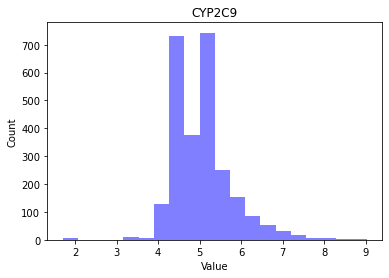

In [27]:
import atomsci.ddm.utils.curate_data as curate_data
imp.reload(curate_data)

data = temp_df
column = 'PIC50' #'VALUE_NUM_mean'
num_bins = 20
units = 'NM' #'log nm'
filepath = ""
title = target.upper()

curate_data.summarize_data(column, num_bins, title, units, filepath, data)

In [28]:
old_compound_id='rdkit_smiles'
new_compound_id='base_rdkit_smiles'

# Takes all the compounds that aren't part of the curated data frame and prints them
reject=smiles_df[~smiles_df[old_compound_id].isin(temp_df[new_compound_id])]
[reject.shape]
reject.head(2)

,compound_id,standard_inchi_key,compound_name,synonym,target_id,target_pref_name,gene_names,wildtype_or_mutant,mutation_info,pubmed_id,...,assay_description,title,journal,doc_type,annotation_comments,PIC50,Unnamed: 0,CID,smiles,rdkit_smiles
34,CHEMBL497783,AGUILNAYEDJFSM-FIFLTTCUSA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,18249473.0,...,Inhibition of human recombinant CYP2C9,Structure-activity relationships for the inhib...,Eur. J. Med. Chem.,PUBLICATION,NaN,4.67162,34,5708672,C1=CC(=CC(=C1)Cl)C=CC(=O)C=CC2=CC(=CC=C2)Cl,O=C(C=Cc1cccc(Cl)c1)C=Cc1cccc(Cl)c1
35,CHEMBL497783,AGUILNAYEDJFSM-FIFLTTCUSA-N,NaN,NaN,P11712,CYTOCHROME P450 2C9,CYP2C9,NaN,NaN,18249473.0,...,Inhibition of human recombinant CYP2C9,Structure-activity relationships for the inhib...,Eur. J. Med. Chem.,PUBLICATION,NaN,1.67200,34,5708672,C1=CC(=CC(=C1)Cl)C=CC(=O)C=CC2=CC(=CC=C2)Cl,O=C(C=Cc1cccc(Cl)c1)C=Cc1cccc(Cl)c1


/home/sarkart4/miniconda3/envs/ampl-1.4.1/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


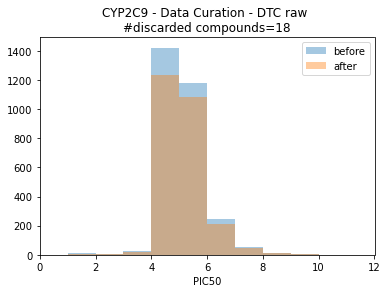

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
before=smiles_df["PIC50"]
after=temp_df["PIC50"] 
sns.distplot(before, bins=range(0, 12, 1), ax=ax, kde=False, label='before')
sns.distplot(after, bins=range(0, 12, 1), ax=ax, kde=False, label='after')
plt.legend()
ax.set_xlim([0, 12])
plt.title(target.upper() +' - Data Curation - DTC raw \n#discarded compounds='+str(reject[compound_id].nunique()));